Class folders found: ['cars', 'Cat', 'dogs', 'flower', 'outputseq']

Files in cars: ['images (11).jpeg', 'images (3).jpeg', 'images (13).jpeg', 'images (14).jpeg', 'images (1).jpeg', 'images (10).jpeg', 'images (2).jpeg', 'images (12).jpeg', 'images (4).jpeg', 'images (9).jpeg', 'download (3).jpeg', 'images (6).jpeg', 'images (5).jpeg', 'download (1).jpeg', 'images (7).jpeg', 'download (18).jpeg', 'download (4).jpeg', 'images.jpeg', 'images (8).jpeg', 'download (2).jpeg', 'download.jpeg']

Files in Cat: ['download (18).jpeg', 'images (1).jpeg', 'download (16).jpeg', 'images.jpeg', 'download (19).jpeg', 'download (20).jpeg', 'download (2).jpeg', 'download (6).jpeg', 'download (11).jpeg', 'download (5).jpeg', 'download.jpeg', 'download (10).jpeg', 'download (14).jpeg', 'download (12).jpeg', 'download (9).jpeg', 'download (3).jpeg', 'download (8).jpeg', 'download (17).jpeg', 'download (13).jpeg', 'download (4).jpeg', 'download (15).jpeg', 'download (1).jpeg', 'download (7).jpeg']

Files i

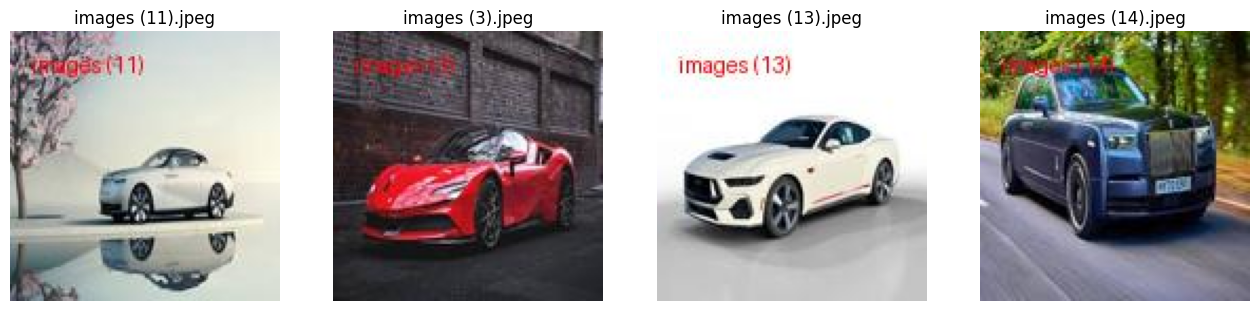

In [ ]:


import os
import time
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

input_folder = '/content/drive/MyDrive/Images /PADC_dataset_image '
output_folder = '/content/drive/MyDrive/Images/outseq'
os.makedirs(output_folder, exist_ok=True)

class_folders = [f for f in os.listdir(input_folder) if os.path.isdir(os.path.join(input_folder, f))]
print('Class folders found:', class_folders)
for class_folder in class_folders:
    class_path = os.path.join(input_folder, class_folder)
    print(f"\nFiles in {class_folder}:", os.listdir(class_path))

def process_image_class_folder(class_subfolder):
    class_path = os.path.join(input_folder, class_subfolder)
    out_class_path = os.path.join(output_folder, class_subfolder)
    os.makedirs(out_class_path, exist_ok=True)
    for img_file in os.listdir(class_path):
        print('Checking:', img_file)
        if img_file.lower().endswith(('jpg', 'jpeg', 'png')):
            in_path = os.path.join(class_path, img_file)
            out_path = os.path.join(out_class_path, img_file)
            print(f'Processing: {in_path} --> {out_path}')
            img = Image.open(in_path).resize((128, 128)).convert("RGB")
            draw = ImageDraw.Draw(img)
            font = ImageFont.load_default()
            watermark_text = os.path.splitext(img_file)[0]
            draw.text((10, 10), watermark_text, font=font, fill=(255, 0, 0))
            img.save(out_path)

start = time.perf_counter()
for class_folder in class_folders:
    process_image_class_folder(class_folder)
total_time = time.perf_counter() - start
print(f"\nSequential Processing Time: {total_time:.2f} seconds")

# Show a few example watermarked images
num_examples = 4
example_images = []
for class_folder in class_folders:
    out_class_path = os.path.join(output_folder, class_folder)
    img_files = [img for img in os.listdir(out_class_path) if img.lower().endswith(('jpg','jpeg','png'))]
    example_images.extend([os.path.join(out_class_path, img) for img in img_files[:num_examples]])
    if len(example_images) >= num_examples:
        break

if example_images:
    print(f"\nShowing up to {num_examples} example watermarked images:")
    fig, axes = plt.subplots(1, len(example_images), figsize=(16, 4))
    if len(example_images) == 1:
        axes = [axes]
    for ax, img_path in zip(axes, example_images):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(os.path.basename(img_path))
    plt.show()
else:
    print("\nNo example images found to display.")
